In [10]:
from breakthrough import *
from my_robot_functions import *  
from classy import *
from pylab import imread,imsave,imshow
from image_defs import *

In [11]:
if BP is None:
    print("Running on the laptop.")
    on_laptop=True
else:
    print("Running on the robot.")
    on_laptop=False
    

Running on the laptop.


## Agent

In [2]:
def get_move(state,player):
    if player==1:
        Q=LoadTable("Q1_breakthrough_table.json")
    else:
        Q=LoadTable("Q2_breakthrough_table.json")
        
    
    if state not in Q:
        return random_move(state,player)  # this is defined in my game functions import
    else:
        return top_choice(Q[state])

## Make Move

In [3]:
def make_move(move):
    print("Making move ",move)
    
    board=Board(4,4)  # just to get the conversion functions for free
    
    start,end=move
    rs,cs=board.rc_from_index(start)  # convert to row, column
    re,ce=board.rc_from_index(end)
    
    distance_to_board=10
    length_column=4
    length_row=4

    type_of_move=ce-cs  # 0 for a forward move, +1 for a right-hand diagonal, -1 for left-hand diagonal
    distance_to_column=distance_to_board+length_column*cs
    distance_to_row=(4-rs)*length_row

    if type_of_move==0:  # forward

        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)
        arm_down()  # to push the piece
        move_forward( 1*length_row )
        arm_up()

        # go back
        move_backward(distance_to_row + 1*length_row)
        turn_robot_right_90()
        move_backward(distance_to_column)

    elif type_of_move==1:  # right-hand diagonal

        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)


        arm_down()  # to push the piece
        turn_robot_right_45()
        move_forward( 1*length_row )

        # go back
        move_backward(1*length_row)
        turn_robot_left_45()    
        move_backward(distance_to_row )
        turn_robot_right_90()
        move_backward(distance_to_column)

    elif type_of_move==-1:  # left-hand diagonal
        move_forward(distance_to_column)
        turn_robot_left_90()
        move_forward(distance_to_row)


        arm_down()  # to push the piece
        turn_robot_left_45()
        move_forward( 1*length_row )

        # go back
        move_backward(1*length_row)
        turn_robot_right_45()    
        move_backward(distance_to_row )
        turn_robot_right_90()
        move_backward(distance_to_column)

    else:
        raise ValueError("You can't get there from here.")


## Read State

In [4]:
def read_state_from_file(filename):
    text=open(filename).read()
    text=text.strip()
    lines=[line.strip() for line in text.split('\n')]  # get rid of \n
    
    row=lines[0].split()
    R,C=len(lines),len(row)
    print(f"{R}x{C} board")
    state=Board(R,C)
    state.board=[int(val) for val in text.split()]  
    print(state)
    return state

In [5]:
def read_state():
    from pylab import imread,imsave
    from numpy import atleast_2d
    import os

    state=Board(4,4)      #<========= change the size
    nr,nc=state.shape

    
    # load the classifier
    classifier=NaiveBayes()
    classifier.load('naive_bayes_trained.json')
    
    
    # get the picture
    filename='current_board.jpg'              # for the robot
    take_picture(filename)


    # this part comes from your Make Training Squares script
    image=imread(filename)

    # these 5 lines are specific to your image
    image=image[30:260,20:340,:]  # truncate if you need to
    gray,black_and_white=get_gray_and_threshold_image(image,threshold=90)
    corners=find_corners(black_and_white,plotit=False)
    im3=straighten_image(image,corners)
    squares=get_board_squares_from_image(im3,state.shape)

    # for debugging
    if not os.path.exists('predicted'):
        os.mkdir('predicted')

    count=0
    values=[]
    for r in range(nr):
        for c in range(nc):
            # convert the square image to a data vector for the classifier
            vector=squares[count].ravel()
            prediction=classifier.predict(atleast_2d(vector))[0]
        
            values.append(prediction)
    
            # for debugging
            imsave('predicted/square %d predicted as piece %d.jpg' % (count,prediction),squares[count])
        
            count+=1

    
    # reconstruct the state from the predictions
    state.board=values

    print("Current state is:")
    print(state)

    x=input("""
    Hit return if this is correct, otherwise type a character 
    and the state will be read from current_board.txt.""")

    if x:
        print("Reading from file...")
        state=read_state_from_file('board.txt')

    print("Using")
    print(state)

    
    return state

In [6]:
classifier=NaiveBayes()
classifier.load('naive_bayes_trained.json')

on the laptop, look at the image to see if the state is correct.  remove this imread and imshow on the robot

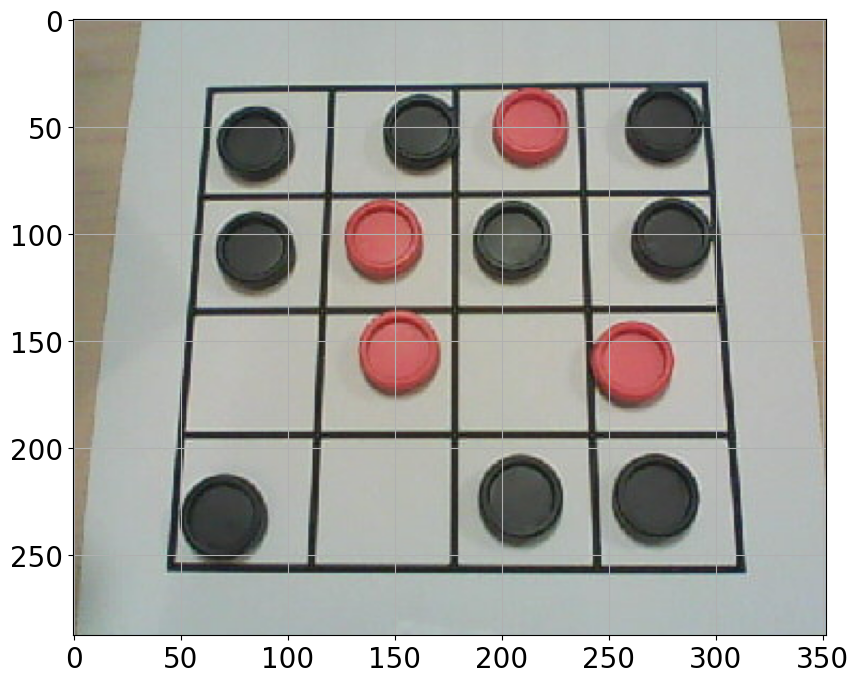

In [12]:
if on_laptop:
    image=imread("current_board.jpg")
    imshow(image)

In [15]:
if on_laptop:
    state=read_state()

(REMOVE THIS FUNCTION FROM my_robot_functions IF YOU'RE ON THE ROBOT
    --- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Setting Brightness to 255 (100%).
Adjusting resolution from 1600x900 to 1600x896.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to 'current_board.jpg'.
    
Current state is:
 1  1  2  1 
 1  2  1  1 
 0  2  0  2 
 1  0  1  1 




    Hit return if this is correct, otherwise type a character 
    and the state will be read from current_board.txt. 


Using
 1  1  2  1 
 1  2  1  1 
 0  2  0  2 
 1  0  1  1 



## Now the entire project

In [9]:
state=read_state()     #  read the state from the world
move=get_move(state,1)   # from an agent
make_move(move)        # robot motion to move pieces, etc...

(REMOVE THIS FUNCTION FROM my_robot_functions IF YOU'RE ON THE ROBOT
    --- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Setting Brightness to 255 (100%).
Adjusting resolution from 1600x900 to 1600x896.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to 'current_board.jpg'.
    
Current state is:
 1  1  2  1 
 1  2  1  1 
 0  2  0  2 
 1  0  1  1 




    Hit return if this is correct, otherwise type a character 
    and the state will be read from current_board.txt. 


Using
 1  1  2  1 
 1  2  1  1 
 0  2  0  2 
 1  0  1  1 

Making move  [14, 9]
forward  18
left 90
forward  4
arm down
left 45
forward  4
backward  4
right 45
backward  4
right 90
backward  18


Using
 1  1  2  1 
 1  2  1  1 
 0  2  0  2 
 1  0  1  1 

Making move  [12, 8]
forward  10
left 90
forward  4
arm down
forward  4
arm up
backward  8
right 90
backward  10
